In [1]:
import numpy as np
import pandas as pd
import time

In [2]:
df = pd.read_csv('../../datasets/Social_Network_Ads.csv')

In [3]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [5]:
X.head(3)

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [7]:
X_scaled.shape

(400, 2)

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [9]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\Jay Sunil Sonawane\anaconda3\envs\dsml_40_env1\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_scaled,y,epochs=100,batch_size=1,validation_split=0.2)
print(time.time() - start)

Epoch 1/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5704 - loss: 0.6747 - val_accuracy: 0.6000 - val_loss: 0.6821
Epoch 2/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8752 - loss: 0.4202 - val_accuracy: 0.7125 - val_loss: 0.6204
Epoch 3/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8704 - loss: 0.3473 - val_accuracy: 0.7250 - val_loss: 0.5396
Epoch 4/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8825 - loss: 0.2683 - val_accuracy: 0.7500 - val_loss: 0.4622
Epoch 5/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8481 - loss: 0.3159 - val_accuracy: 0.7500 - val_loss: 0.4286
Epoch 6/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8231 - loss: 0.3613 - val_accuracy: 0.7875 - val_loss: 0.3907
Epoch 7/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8580 - loss: 0.3063 - val_accuracy: 0.8000 - val_loss: 0.3682
Epoch 8/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8710 - loss: 0.2824 - val_accu

In [24]:
# 110 seconds required

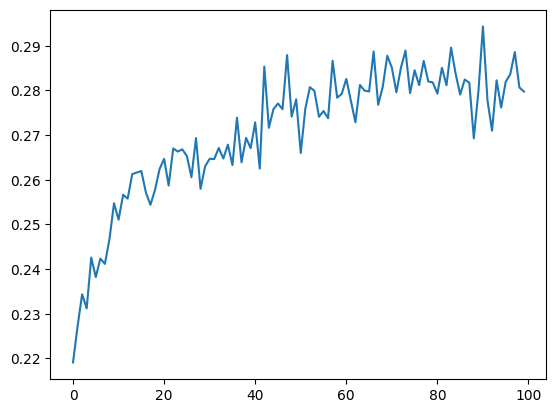

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])